In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Read in the features 3 sec.csv dataset using pandas and create the y label vector that we
will use throughout, which will be the label column. Remove the filename and label columns
from the dataframe (using drop) and create the X features matrix from the remainder of
the columns. Create a train-test split on the data; use a fixed random state (noted in your
write-up) and a test size=0.2. In all cases, unless otherwise specified, leave the MLPClassifier
parameters to their defaults, except use activation=“tanh”, solver=“sgd”, and fix a random
state value of your choice.

In [47]:
df = pd.read_csv('Data\\features_3_sec.csv')
y_vec = np.array(df.loc[:,"label"])
print(y_vec) 
df = df.drop(columns=['filename','label'])
print(df)

#split
X_tr, X_te, Y_tr,Y_te = train_test_split(df,y_vec,test_size=0.20,random_state = 42)


['blues' 'blues' 'blues' ... 'rock' 'rock' 'rock']
      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               

Question 1 (5 points): For each of the features of the data (length, chroma stft mean,
etc.), calculate and print the mean and standard deviation of that feature value in X train.
Describe (in 1-3 sentences) why these values might cause an issue when using the raw values
for neural network classification.


In [48]:
for feature in X_tr:
    print("Feature:", feature)
    cur = X_tr.loc[:,feature]
    print("mean:", np.mean(cur))
    print("standard deviation:",np.std(cur),"\n")

Feature: length
mean: 66149.0
standard deviation: 0.0 

Feature: chroma_stft_mean
mean: 0.3793348486780434
standard deviation: 0.08994476733531448 

Feature: chroma_stft_var
mean: 0.08491067684514704
standard deviation: 0.009636830553150478 

Feature: rms_mean
mean: 0.13045734546834067
standard deviation: 0.06831589241988416 

Feature: rms_var
mean: 0.0026741077189679236
standard deviation: 0.003602569391982133 

Feature: spectral_centroid_mean
mean: 2197.217605496407
standard deviation: 750.5751506552442 

Feature: spectral_centroid_var
mean: 416394.5709013398
standard deviation: 435125.0983493911 

Feature: spectral_bandwidth_mean
mean: 2241.4160274982455
standard deviation: 542.0331439300644 

Feature: spectral_bandwidth_var
mean: 118876.02725554115
standard deviation: 101086.7718012885 

Feature: rolloff_mean
mean: 4562.063904866029
standard deviation: 1638.4681035407077 

Feature: rolloff_var
mean: 1635723.1968233867
standard deviation: 1494492.381244041 

Feature: zero_crossing_r

Question 2 (5 points): Using sklearn’s preprocessing.StandardScaler(), fit to the X train
data, and transform both the X train and X test data based on the pre-processing fit. Again,
for each of the features of the data (length, chroma stft mean, etc.), calculate and print the
mean and standard deviation of that feature value in the updated, pre-processed X train.
Describe briefly (in 1-3 sentences) what happened and why it might be a good idea to do
this transformation for a multi-layer perceptron.


In [49]:
scaler = StandardScaler()
scaler.fit(X_tr)

X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

Question 3 (30 points): Use K-fold cross-validation with three folds to find the best values
to use for the number of neurons in a single hidden layer across 50, 100, 200, and 500
neurons and for the initial learning rate (learning rate init) across 0.0001, 0.001, 0.01, 0.1,
and 1. Create a heatmap showing the average validation accuracy across all folds for each
parameter combination. Note in your report which combination performs best.

In [50]:
splits = KFold(n_splits=3)

X_tr = pd.DataFrame(X_tr)
# MLPClassifier
# parameters to their defaults, except use activation=“tanh”, solver=“sgd”, and fix a random
# state value of your choice.
H = [50, 100, 200, 500]
L = [0.0001, 0.001, 0.01, 0.1, 1]
val_acc = []
for hidden_layer in H:
    for learning_rate in L:
        for train_index, val_index in splits.split(X_tr):
            clf = MLPClassifier(random_state=42, learning_rate_init=learning_rate, hidden_layer_sizes=hidden_layer,activation='tanh', solver='sgd')
            X_subtrain = X_tr.iloc[train_index]
            X_val = X_tr.iloc[val_index]
            y_subtrain = Y_tr[train_index]
            y_val = Y_tr[val_index]
            clf.fit(X_subtrain, y_subtrain)
            y_predict = clf.predict(X_val)
            
            val_acc.append(accuracy_score(y_val, y_predict))
            


C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bahou\A

hidden_layer = 50, learning_rate = 0.0001:
std dev:  0.011139650332359856
mean:  0.5082582582582583 

hidden_layer = 50, learning_rate = 0.001:
std dev:  0.007625449942538845
mean:  0.7117117117117117 

hidden_layer = 50, learning_rate = 0.01:
std dev:  0.004007912256768511
mean:  0.8078078078078078 

hidden_layer = 50, learning_rate = 0.1:
std dev:  0.002174442842465271
mean:  0.7892892892892892 

hidden_layer = 50, learning_rate = 1:
std dev:  0.006223638696419358
mean:  0.744994994994995 

hidden_layer = 100, learning_rate = 0.0001:
std dev:  0.015617099400772001
mean:  0.5741991991991992 

hidden_layer = 100, learning_rate = 0.001:
std dev:  0.002955708661415857
mean:  0.7301051051051051 

hidden_layer = 100, learning_rate = 0.01:
std dev:  0.007246462580365491
mean:  0.8378378378378378 

hidden_layer = 100, learning_rate = 0.1:
std dev:  0.0034449198943784123
mean:  0.8435935935935936 

hidden_layer = 100, learning_rate = 1:
std dev:  0.014580164601897892
mean:  0.7901651651651651

Text(0, 0.5, 'hidden_layer')

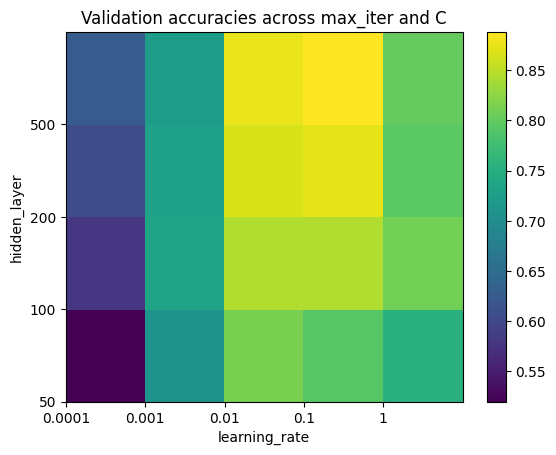

In [51]:
matrix = [[],[],[],[]]
for i in range(len(H)):
    for j in range(len(L)): 
        culs_val = []
        val = 0
        for k in range(3):
            val = val_acc[i*15 + j*3 + k]
            culs_val.append(val_acc[i*15 + j*3 + k])

        print("hidden_layer = {}, learning_rate = {}:".format(H[i],L[j]))
        print("std dev: ", np.std(culs_val))
        print("mean: ", np.mean(culs_val),"\n")
        matrix[i].append(val)

plt.pcolor(matrix)
plt.colorbar()

plt.title("Validation accuracies across max_iter and C")

plt.xticks(np.arange(len(L)), L)
plt.xlabel("learning_rate")
plt.yticks(np.arange(len(H)), H)
plt.ylabel("hidden_layer")

In [52]:
print(val_acc)

[0.49324324324324326, 0.5116366366366366, 0.5198948948948949, 0.7218468468468469, 0.7034534534534534, 0.7098348348348348, 0.8055555555555556, 0.8044294294294294, 0.8134384384384384, 0.7864114114114115, 0.7897897897897898, 0.7916666666666666, 0.7413663663663663, 0.7398648648648649, 0.7537537537537538, 0.5533033033033034, 0.5908408408408409, 0.5784534534534534, 0.7286036036036037, 0.7274774774774775, 0.7342342342342343, 0.8415915915915916, 0.8277027027027027, 0.8442192192192193, 0.8472222222222222, 0.838963963963964, 0.8445945945945946, 0.7755255255255256, 0.7849099099099099, 0.81006006006006, 0.5968468468468469, 0.5968468468468469, 0.603978978978979, 0.7244744744744744, 0.722972972972973, 0.7278528528528528, 0.8506006006006006, 0.8521021021021021, 0.8663663663663663, 0.8693693693693694, 0.8626126126126126, 0.8731231231231231, 0.795045045045045, 0.7916666666666666, 0.7935435435435435, 0.6137387387387387, 0.6186186186186187, 0.6242492492492493, 0.7180930930930931, 0.7169669669669669, 0.72

Question 4 (25 points): Use K-fold cross-validation with three folds to find the structure of
the network to use. Set the initial learning rate to be the best value you found in Question 3.
Try the following combinations of network structure: (100), (100,100), (100,100,100), (200),
(200,100), (200,100,100), (500), (500,200), (500,200,100). Note the structure of the network
that gives the best results in the report.

In [53]:
# MLPClassifier
# parameters to their defaults, except use activation=“tanh”, solver=“sgd”, and fix a random
# state value of your choice.
H = [(100), (100,100), (100,100,100), (200), (200,100), (200,100,100), (500), (500,200), (500,200,100)]

val_acc = []
for hidden_layer in H:
    clus_val = []
    for train_index, val_index in splits.split(X_tr):
        clf = MLPClassifier(random_state=42, learning_rate_init=0.1, hidden_layer_sizes=hidden_layer,activation='tanh', solver='sgd')
        X_subtrain = X_tr.iloc[train_index]
        X_val = X_tr.iloc[val_index]
        y_subtrain = Y_tr[train_index]
        y_val = Y_tr[val_index]
        clf.fit(X_subtrain, y_subtrain)
        y_predict = clf.predict(X_val)
        clus_val.append(accuracy_score(y_val, y_predict))


    print("netword structure {}:".format(hidden_layer))
    print("std dev: ", np.std(clus_val))
    print("mean: ", np.mean(clus_val),"\n")



netword structure 100:
std dev:  0.0034449198943784123
mean:  0.8435935935935936 

netword structure (100, 100):
std dev:  0.0038075886022779955
mean:  0.8606106106106107 

netword structure (100, 100, 100):
std dev:  0.006140062135327973
mean:  0.8638638638638638 

netword structure 200:
std dev:  0.00434888568493064
mean:  0.8683683683683684 

netword structure (200, 100):
std dev:  0.004294545120553166
mean:  0.8770020020020021 

netword structure (200, 100, 100):
std dev:  0.0007078145957823401
mean:  0.8788788788788789 

netword structure 500:
std dev:  0.005753035001287596
mean:  0.8805055055055057 

netword structure (500, 200):
std dev:  0.003716026627857272
mean:  0.8885135135135135 

netword structure (500, 200, 100):
std dev:  0.003389944240276277
mean:  0.8906406406406407 



Question 5 (20 points): Using the best structure and best initial learning rates found above,
now train MLPs on the entire training set for 1000 iterations (max iter=1000). Generate 10
different random integers to use as initial random states for each MLP, but otherwise, use
the same parameters. Show the training and testing accuracy for each of the 10 classifiers.
Plot the 10 resulting loss curves (note that you can access the loss curve from the classifier
in clf.loss curve ).

[623, 861, 714, 160, 321, 334, 253, 189, 187, 803]


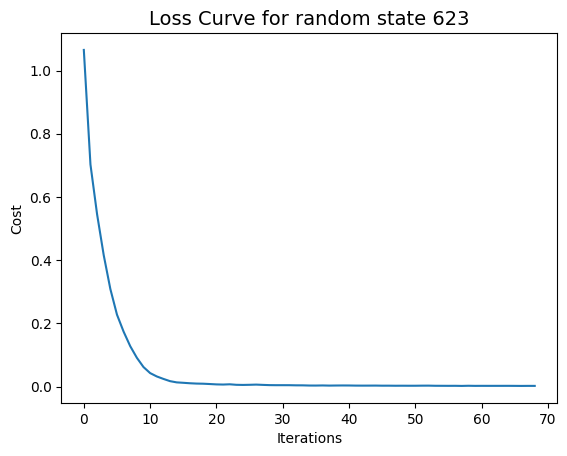

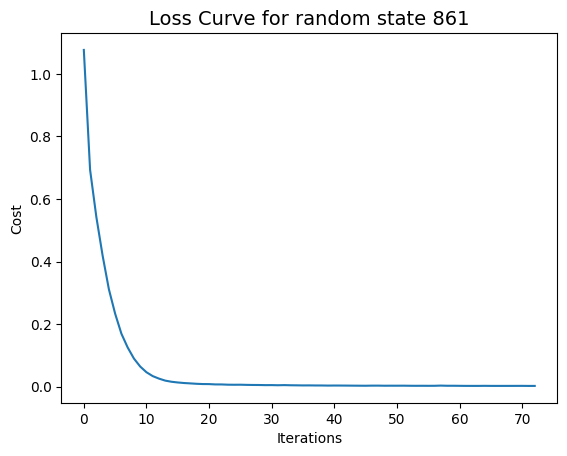

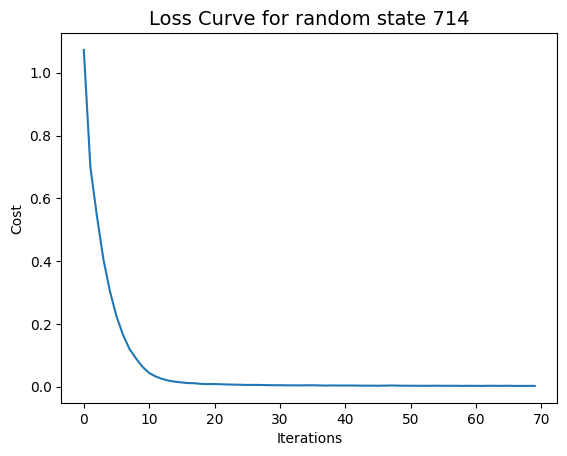

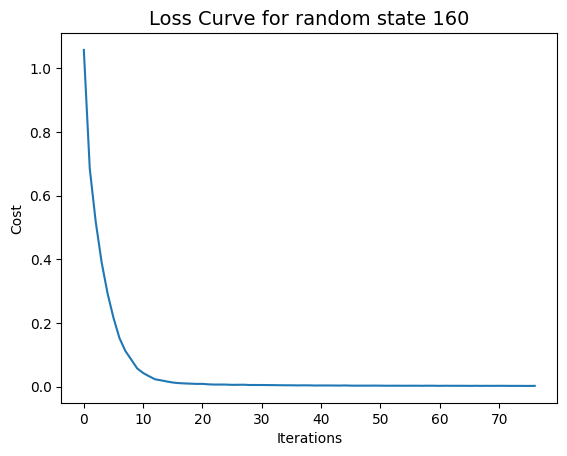

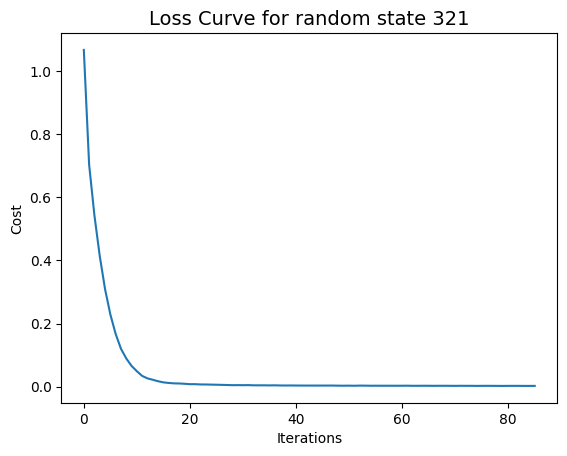

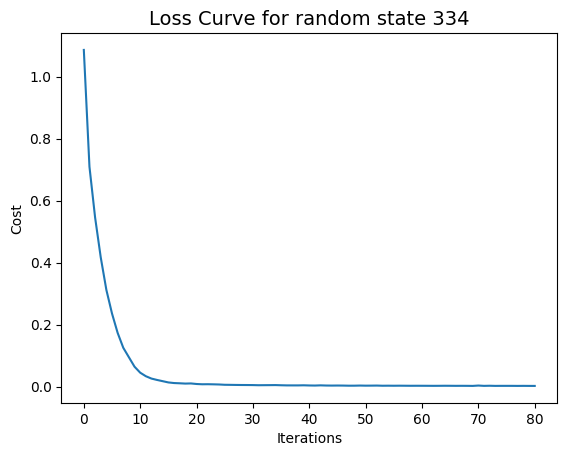

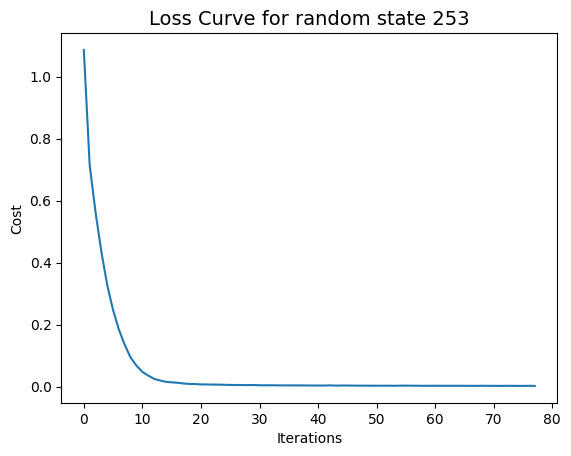

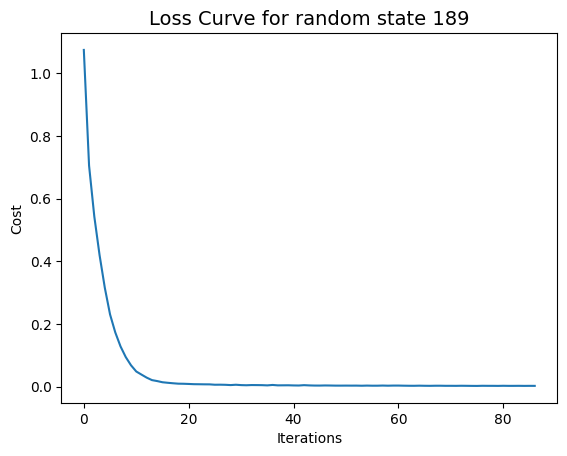

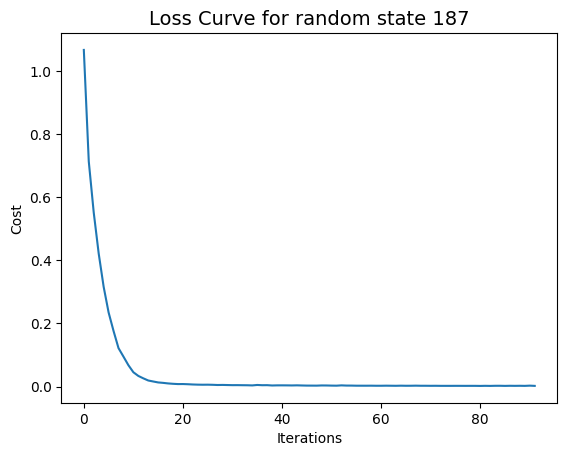

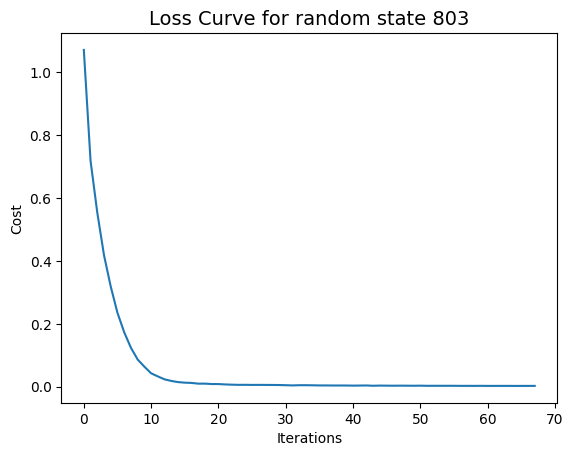

In [54]:
import random

random_state = [random.randint(1,1000) for i in range(10)]
print(random_state)

for rand in random_state:
    clf = MLPClassifier(random_state=rand, learning_rate_init=0.1, hidden_layer_sizes=(500,200,100), max_iter =1000,activation='tanh', solver='sgd')
    clf.fit(X_tr, Y_tr)

    plt.plot(clf.loss_curve_)
    plt.title("Loss Curve for random state {}".format(rand), fontsize=14)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()


Question 6 (15 points): Show the confusion matrix for the classifier. Print the matrix itself.
Plot the confusion matrix with a heatmap (I recommend using seaborn’s heatmap for this).
Which classes are most often confused for each other? Include a brief discussion of this in
the report (1-3 sentences).

C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


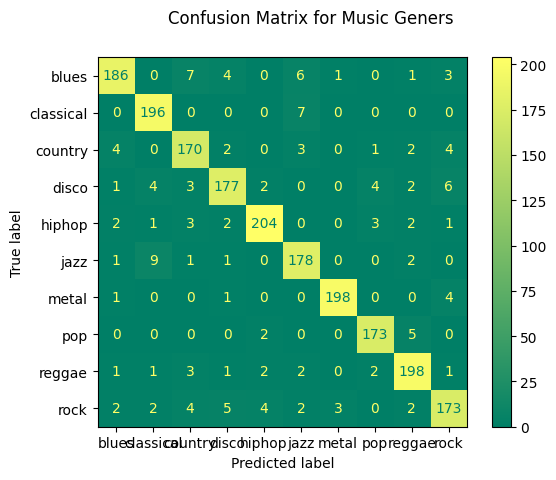

In [55]:
Y_precit = clf.predict(X_te)
matrix = confusion_matrix(Y_te, Y_precit)
fig = plot_confusion_matrix(clf, X_te, Y_te, cmap = 'summer')
fig.figure_.suptitle("Confusion Matrix for Music Geners")

plt.show()